<a href="https://colab.research.google.com/github/akshat-d-jain/Reinforcement-Learning/blob/main/RL2_policy_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from envs import Maze
from utils import plot_policy, plot_values, test_agent


/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

In [ ]:
env=Maze()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


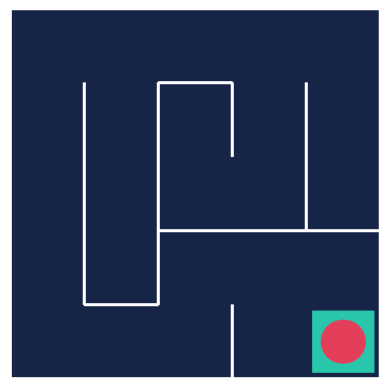

In [ ]:
frame=env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [ ]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"No of actions: {env.action_space.n}")

Observation space shape: [5 5]
No of actions: 4


In [ ]:
policy_probs=np.full((5,5,4), 0.25)

In [ ]:
def policy(state):
  return policy_probs[state]


In [ ]:
action_probabilities=policy((0,1))
for action, prob in zip(range(4), action_probabilities):
  print(f"Probability of taking an action {action}: {prob}")

Probability of taking an action 0: 0.25
Probability of taking an action 1: 0.25
Probability of taking an action 2: 0.25
Probability of taking an action 3: 0.25


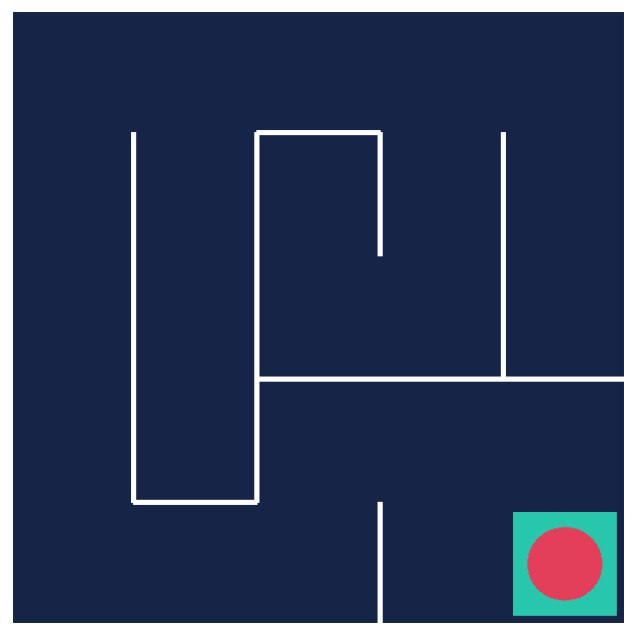

In [ ]:
test_agent(env, policy, episodes=1)

In [ ]:
#plot_policy(policy_probs, frame)

In [ ]:
state_values=np.zeros((5,5))

In [ ]:
def policy_evaluation(policy_probs, state_values, theta=1e-6, gamma=0.99):
  delta=float("inf")

  while delta>theta:
    delta=0

    for row in range(5):
      for col in range(5):
        old_value=state_values[(row, col)]
        new_value=0
        action_probabilities=policy_probs[(row, col)]

        for action, prob in enumerate( action_probabilities):
          next_state, reward, _, _=env.simulate_step((row, col), action)
          new_value += prob * (reward + gamma * state_values[next_state])

        state_values[(row, col)]=new_value
        delta=max(delta, abs(old_value-new_value))

  return state_values



In [ ]:
def policy_improvement(policy_probs, state_values, gamma=0.99):

  policy_stable=True

  for row in range(5):
    for col in range(5):
      old_action = policy_probs[(row, col)].argmax()

      new_action = None
      max_qsa = float("-inf")

      for action in range(4):
        next_state, reward, _, _ = env.simulate_step((row, col), action)
        qsa = reward + gamma * state_values[next_state]
        if qsa > max_qsa:
          max_qsa = qsa
          new_action = action

      action_probs = np.zeros(4)
      action_probs[new_action] = 1
      policy_probs[(row, col)] = action_probs

      if old_action != new_action:
        policy_stable = False

  return policy_stable

In [ ]:
def policy_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
  policy_stable=False

  while not policy_stable:
    state_values=policy_evaluation(policy_probs, state_values, theta, gamma)
    policy_stable=policy_improvement(policy_probs, state_values, gamma)

  return policy_probs, state_values

In [ ]:
policy_iteration(policy_probs, state_values)

(array([[[0., 0., 1., 0.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.]],
 
        [[0., 0., 1., 0.],
         [1., 0., 0., 0.],
         [0., 0., 1., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],
 
        [[0., 0., 1., 0.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],
 
        [[0., 0., 1., 0.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]],
 
        [[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.]]]),
 array([[-9.56189012e+00, -1.04662712e+01, -1.13616085e+01,
         -1.22479924e+01, -1.31255125e+01],
        [-8.64837287e+00, -1.13616085e+01, -1.57057735e+01,
         -1.31255125e+01, -1.39942574e+01],
        [-7.72562818e+00, -1.22479924e+01, -1.48543157e+01,
         -1.39942574e+01, -1.48543148e+01]

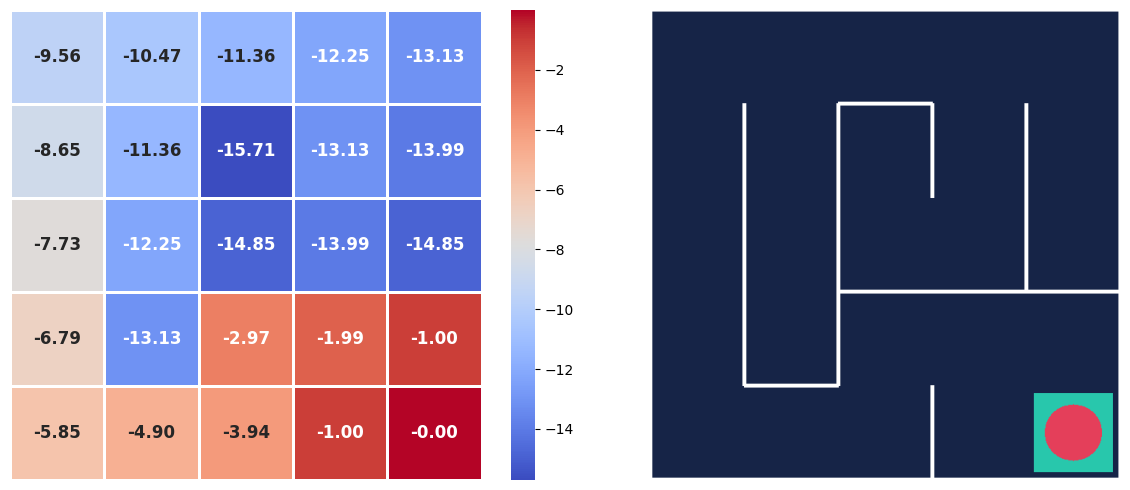

In [ ]:
plot_values(state_values, frame)

In [ ]:
plot_policy(policy_probs, frame)

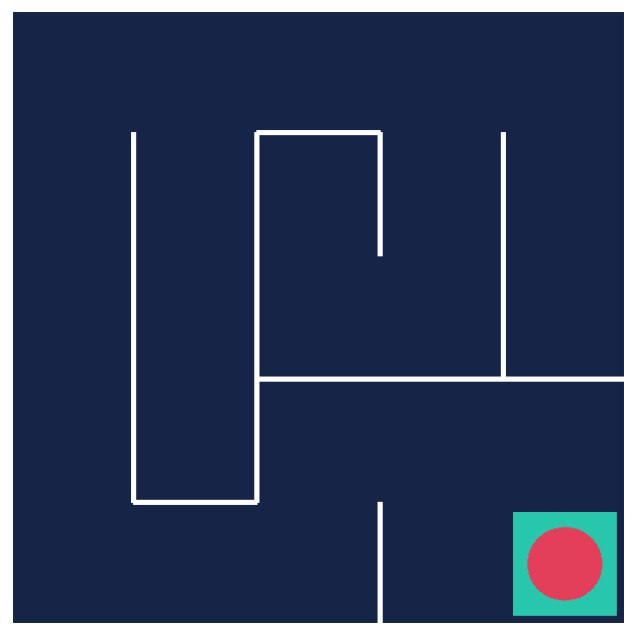

In [ ]:
test_agent(env, policy, episodes=3)